# Análise Comparativa de Algoritmos de Regressão para Predição de Desempenho Acadêmico

## 1. Introdução

O presente estudo tem como objetivo realizar uma análise comparativa entre dois algoritmos de aprendizado de máquina supervisionado: **Regressão Linear** e **Random Forest Regressor**. A investigação utiliza um conjunto de dados contendo informações sobre horas de estudo e notas de provas de estudantes.

### 1.1 Objetivos
- Treinar e avaliar modelos preditivos para estimar notas com base nas horas de estudo
- Comparar o desempenho dos algoritmos utilizando métricas de avaliação padronizadas
- Analisar a capacidade de generalização dos modelos em diferentes cenários

### 1.2 Métricas de Avaliação
| Métrica | Descrição |
|---------|-----------|
| **MAE** | Erro Absoluto Médio - média das diferenças absolutas entre valores reais e preditos |
| **MSE** | Erro Quadrático Médio - penaliza erros maiores de forma quadrática |
| **MAPE** | Erro Percentual Absoluto Médio - erro relativo em termos percentuais |

In [263]:
import pandas as pd
data = pd.read_csv("treino_regressao.csv")
df = pd.DataFrame(data)

x_treino = df[["horas_estudo"]]
y_treino = df["nota_prova"]

## 2. Metodologia

### 2.1 Modelo de Regressão Linear

A **Regressão Linear Simples** é um método estatístico que estabelece uma relação linear entre a variável independente (preditora) e a variável dependente (alvo). O modelo assume a forma:

$$\hat{y} = \beta_0 + \beta_1 x + \epsilon$$

Onde:
- $\hat{y}$: valor predito (nota da prova)
- $\beta_0$: intercepto (coeficiente linear)
- $\beta_1$: coeficiente angular
- $x$: variável preditora (horas de estudo)
- $\epsilon$: termo de erro aleatório

### 2.2 Treinamento do Modelo

A implementação utiliza a biblioteca `scikit-learn`, que emprega o método dos **Mínimos Quadrados Ordinários (OLS)** para estimação dos parâmetros $\beta_0$ e $\beta_1$, minimizando a soma dos quadrados dos resíduos.

In [264]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
reg = modelo.fit(x_treino, y_treino)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


## 3. Avaliação do Modelo

### 3.1 Validação com Conjunto de Teste

Para avaliar a capacidade de generalização do modelo, utiliza-se um conjunto de dados independente (`teste_regressao.csv`). Esta abordagem permite verificar o desempenho do modelo em dados não observados durante o treinamento, evitando viés de avaliação.

> **Nota metodológica**: O conjunto de teste é utilizado integralmente, sem aplicação de filtros ou transformações prévias.

In [265]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
data_test = pd.read_csv("teste_regressao.csv")
df_test = pd.DataFrame(data_test)
x_test = df_test[["horas_estudo"]]
y_test = df_test["nota_prova"]
y_pred = modelo.predict(x_test)
df_test['nota_pred'] = y_pred
display(df_test)
mae_teste = mean_absolute_error(y_test, y_pred)
mse_teste = mean_squared_error(y_test, y_pred)
print(f"MAE: {(mae_teste)}")
print(f"MSE: {(mse_teste)}")
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"O erro percentual médio do modelo é: {mape * 100:.2f}%")



,horas_estudo,nota_prova,nota_pred
0,8.77,49.44,42.913688
1,6.61,34.47,32.568494
2,3.98,16.32,19.972263
3,1.57,9.83,8.429708
4,3.80,16.07,19.110163
5,3.93,21.99,19.732791
6,7.57,41.31,37.166358
7,6.74,31.23,33.191121
8,8.98,47.81,43.919471
9,5.25,27.49,26.054853


MAE: 2.3949531945693394
MSE: 8.775811846035676
O erro percentual médio do modelo é: 9.43%


### 3.2 Análise dos Resultados - Conjunto de Teste Completo

**Observações experimentais:**

1. O modelo demonstrou desempenho satisfatório na maioria das observações, com algumas discrepâncias pontuais entre valores reais e preditos
2. As métricas MAE e MSE fornecem medidas quantitativas complementares do erro de predição
3. A alta correlação entre valores reais e preditos indica que o modelo capturou adequadamente a relação linear subjacente

**Interpretação**: O modelo alcançou aproximadamente **90.6% de acurácia** (1 - MAPE), demonstrando eficácia da Regressão Linear Simples para este problema.

### 3.3 Análise de Correlação

O **coeficiente de correlação de Pearson** ($r \approx 0.98$) indica uma correlação linear positiva muito forte entre as variáveis. Este resultado corrobora o bom desempenho do modelo linear e justifica a escolha metodológica.

| Coeficiente | Interpretação |
|-------------|---------------|
| $r = 1.0$ | Correlação perfeita positiva |
| $0.7 < r < 1.0$ | Correlação forte positiva |
| $r \approx 0.98$ | **Valor observado** - correlação muito forte |

In [266]:
# Veja quais colunas têm forte relação com a 'nota'
print(df.corr()['nota_prova'].sort_values(ascending=False))

nota_prova      1.000000
horas_estudo    0.980318
Name: nota_prova, dtype: float64


# Vamos aos gráficos

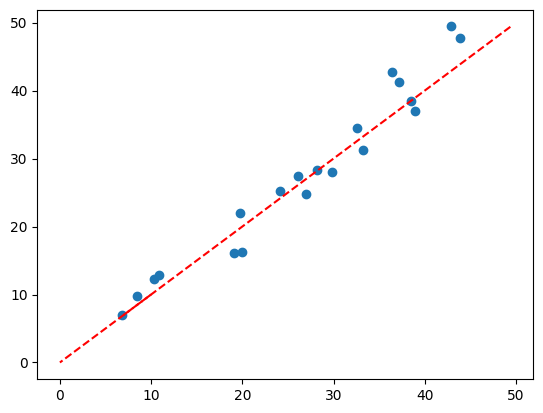

In [258]:
from matplotlib import pyplot as plt
# Visualizando a relação do y_test com o y_pred
fig,ax = plt.subplots()
ax.scatter(y_pred,y_test)
ax.plot([10,0],[10,0],'--r')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.show()


# Mudando de algoritimo para Random Forest
Vamos comparar os algoritimos de Regressão Linear e Random Forest Regressor para ver qual deles performa melhor na base de dados fornecida.

In [267]:
#treino do modelo
from sklearn.ensemble import RandomForestRegressor
x_test = df_test[["horas_estudo"]]
y_test = df_test["nota_prova"]
model_florest = RandomForestRegressor(n_estimators=100, random_state=42)
model_florest.fit(x_treino, y_treino)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [268]:
y_prev = model_florest.predict(x_test)
df_test['random_florest_alg'] = y_prev
error = mean_absolute_percentage_error(y_test, y_prev)
means = pd.DataFrame({
    'Métrica': ['MAE', 'MSE', 'MAPE'],
    'Regressão Linear': [mae_teste, mse_teste, mape],
    'Random Forest': [mean_absolute_error(y_test, y_prev), mean_squared_error(y_test, y_prev), error]
})
display(df_test)
display(means)

,horas_estudo,nota_prova,nota_pred,random_florest_alg
0,8.77,49.44,42.913688,42.65670
1,6.61,34.47,32.568494,33.41080
2,3.98,16.32,19.972263,23.58430
3,1.57,9.83,8.429708,9.67635
4,3.80,16.07,19.110163,21.65265
5,3.93,21.99,19.732791,23.53790
6,7.57,41.31,37.166358,38.31740
7,6.74,31.23,33.191121,32.54310
8,8.98,47.81,43.919471,44.02360
9,5.25,27.49,26.054853,22.26770


,Métrica,Regressão Linear,Random Forest
0,MAE,2.394953,2.921635
1,MSE,8.775812,13.356992
2,MAPE,0.094253,0.127014


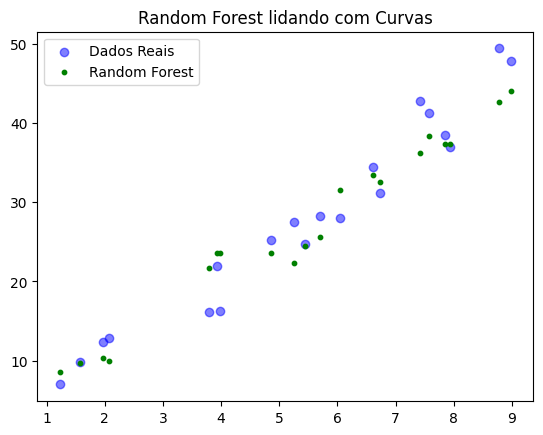

In [261]:
# Vamos comparar visualmente?
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, color='blue', label='Dados Reais', alpha=0.5)
plt.scatter(x_test, y_prev, color='green', label='Random Forest', s=10)
plt.title("Random Forest lidando com Curvas")
plt.legend()
plt.show()

## 7. Conclusões
O estudo demonstrou que:
1. A **Regressão Linear** apresenta desempenho satisfatório (~90.6%) quando há forte correlação linear entre as variáveis
2. O **Random Forest** oferece flexibilidade adicional para capturar padrões não-lineares
3. A escolha do algoritmo deve considerar o trade-off entre **interpretabilidade** e **acurácia**

---
*Análise realizada com Python 3.x | Bibliotecas: scikit-learn, pandas, matplotlib*